1. 绘制分组分析图 数量/ 比率/ 比例三元图
2. 前后Ttest分析（基于距离？？）


In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# ignore warings of notebook

In [2]:
# import modules

import scipy.cluster.vq as scv
from PIL import Image
import numpy as np
from scipy import misc

import pandas as pd
import geopandas as gpd
import statsmodels.formula.api as smf
import itertools
from shapely.geometry import Point, Polygon, LineString

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

import datetime
import time

from tqdm import tqdm
import os

from tqdm import tqdm

import plotly.express as px

In [3]:
df = pd.read_csv('../04_output/1017datacount.csv')

In [4]:
df

Unnamed: 0            cluster  start_date  count
0              0        east_area_0  2022-04-23    9.0
1              1        east_area_1  2022-04-23    4.0
2              2        east_area_2  2022-04-23    3.0
3              3      middle_area_0  2022-04-23   20.0
4              4      middle_area_1  2022-04-23    1.0
...          ...                ...         ...    ...
2245        2245  sourthwest_area_1  2022-08-25    5.0
2246        2246  sourthwest_area_2  2022-08-25    6.0
2247        2247        west_area_0  2022-08-25    2.0
2248        2248        west_area_1  2022-08-25    4.0
2249        2249        west_area_2  2022-08-25    1.0

[2250 rows x 4 columns]

## 1. 数量/比率可视化

In [5]:
# 数量viz
def plot_cluster(cluster, data, ax, attributeX,attributeY):

    for cluster_inner in CLUSTERS:
        d = data[data["cluster"] == cluster_inner] 
        x = d[attributeX].values
        y = d[attributeY].values
# 0b53c1
        if cluster_inner == cluster:
            ax.plot(x, y, color="orange", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="orange", s=60, lw=2.4, zorder=12) # 打点

        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)# 灰线

    ax.set_yticks([])
    # Set location of horizontal ticks
    # ax.set_xticks([16,19,25,34])

    # Set labels for horizontal ticks
    # ax.set_xticklabels(
    #     ["w0", "w3", "w9", "w18"], 
    #     fontsize=16,
    # )
    ax.tick_params(bottom=False)
    ax.set_frame_on(False)

    ax.set_title(cluster +'_'+ attribute, fontsize=14, fontweight=500)
    
    return ax

In [6]:
# df = keep_gdf.groupby(['cluster','start_week']).count()['trid'].reset_index()

# # 插值
# for i in df[df['start_week'] == 2].index:
#     a = df[df['cluster'] == df.loc[i,'cluster']][df['start_week'] == 1]['trid']
#     b = df.loc[i,'trid']
#     df.loc[i,'trid'] = int((a/7)*3 + (b/2)*4)
    
# # # normalize
# # df['trid_n'] = df['trid'].apply(lambda x : (np.e**x-1)/(np.e**x))

# # viz!
# # 输入数据集，按周和cluster聚类

# # CLUSTERS = df['cluster'].unique()
# data = df
# attribute = 'trid'
# fig, axes = plt.subplots(3,6, sharex=True, sharey=True, figsize=(24, 10))
# for idx, (ax, cluster) in enumerate(zip(axes.ravel(), CLUSTERS)):
#     plot_cluster(cluster, data, ax, attribute)

# # Since sharey=True, all vertical axis are inverted when we invert it in one subplot.
# # ax.invert_yaxis()

In [7]:
# 构造比率数据集

In [8]:
df = df[['cluster','start_date','count']]

In [9]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [10]:
df['start_week'] = df['start_date'].apply(lambda x: x.week)

In [11]:
df.cluster.apply(lambda x:x[:-7]).unique().tolist()

['east', 'middle', 'north', 'northwest', 'sourthwest', 'west']

In [12]:
def plot1(direction):
    CLUSTERS = df_east_area_group['cluster'].unique()
    data = df_east_area_group
    annotate = None
    attributeX = 'start_week'
    attributeY = 'count'
    fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(6, 5))

    # plot_cluster(CLUSTERS[0], data,  axes, attributeX,attributeY)

    # for idx, (ax, cluster) in enumerate(zip(axes.ravel(), CLUSTERS)):
    #     plot_cluster(cluster, data,  ax, attributeX,attributeY)
    #     break

    ax = axes

    for cluster_inner in CLUSTERS:
        d = data[data["cluster"] == cluster_inner] 
        x = d[attributeX].values
        y = d[attributeY].values
    # 0b53c1
        if cluster_inner == CLUSTERS[0]:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12) # 打点
        if cluster_inner == CLUSTERS[1]:
            ax.plot(x, y, color="lightblue", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="lightblue", s=60, lw=2.4, zorder=12) # 打点
        if cluster_inner == CLUSTERS[2]:
            ax.plot(x, y, color="darkblue", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="darkblue", s=60, lw=2.4, zorder=12) # 打点

        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)# 灰线
            
        ax.set_title(cluster_inner[:-7] +'_'+ attributeY, fontsize=14, fontweight=500)


    ax.set_yticks([])
    # Set location of horizontal ticks
    # ax.set_xticks([16,19,25,34])

    # Set labels for horizontal ticks
    # ax.set_xticklabels(
    #     ["w0", "w3", "w9", "w18"], 
    #     fontsize=16,
    # )
    ax.tick_params(bottom=False)
    ax.set_frame_on(False)


    plt.savefig('../04_output/'+CLUSTERS[0][:-2]+'_count1.png')

def plot2(direction):
    CLUSTERS = df_east_area_group['cluster'].unique()
    data = df_east_area_group
    annotate = None
    attributeX = 'start_week'
    attributeY = 'weekrate'
    fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(6, 5))

    # plot_cluster(CLUSTERS[0], data,  axes, attributeX,attributeY)

    # for idx, (ax, cluster) in enumerate(zip(axes.ravel(), CLUSTERS)):
    #     plot_cluster(cluster, data,  ax, attributeX,attributeY)
    #     break

    ax = axes

    for cluster_inner in CLUSTERS:
        d = data[data["cluster"] == cluster_inner] 
        x = d[attributeX].values
        y = d[attributeY].values
    # 0b53c1
        if cluster_inner == CLUSTERS[0]:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12) # 打点
        if cluster_inner == CLUSTERS[1]:
            ax.plot(x, y, color="lightblue", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="lightblue", s=60, lw=2.4, zorder=12) # 打点
        if cluster_inner == CLUSTERS[2]:
            ax.plot(x, y, color="darkblue", lw=2.4, zorder=10)# 实线
            ax.scatter(x, y, fc="w", ec="darkblue", s=60, lw=2.4, zorder=12) # 打点

        else:
            ax.plot(x, y, color="#BFBFBF", lw=1.5)# 灰线
        ax.set_title(cluster_inner[:-7] +'_'+ attributeY, fontsize=14, fontweight=500)


    ax.set_yticks([])
    # Set location of horizontal ticks
    # ax.set_xticks([16,19,25,34])

    # Set labels for horizontal ticks
    # ax.set_xticklabels(
    #     ["w0", "w3", "w9", "w18"], 
    #     fontsize=16,
    # )
    ax.tick_params(bottom=False)
    ax.set_frame_on(False)


    plt.savefig('../04_output/'+CLUSTERS[0][:-2]+'_weekrate1.png')

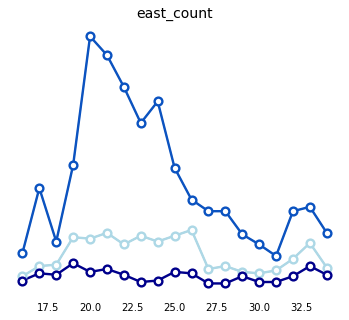

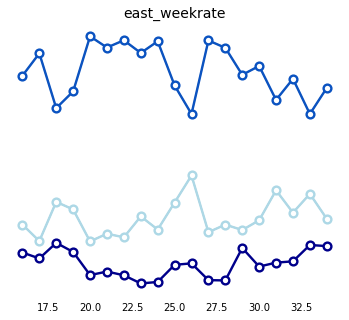

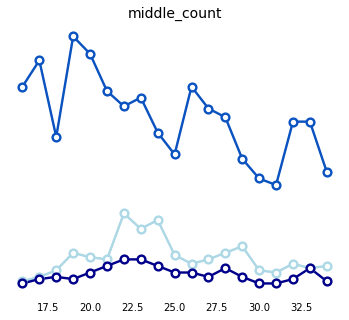

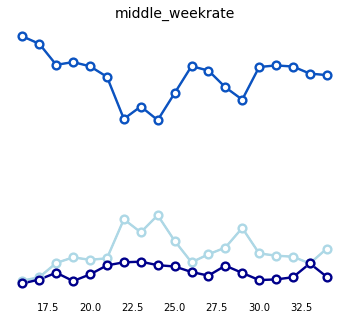

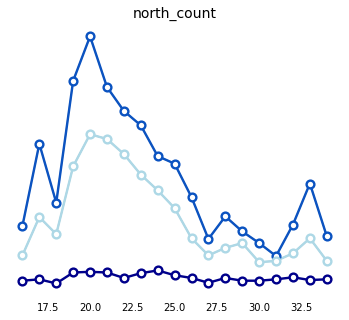

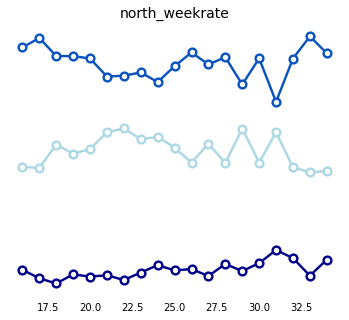

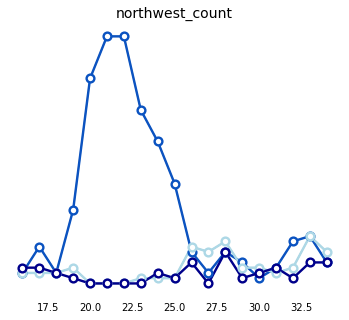

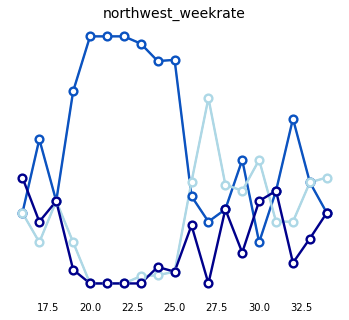

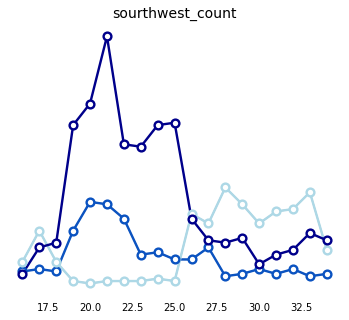

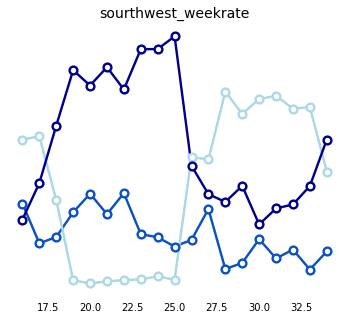

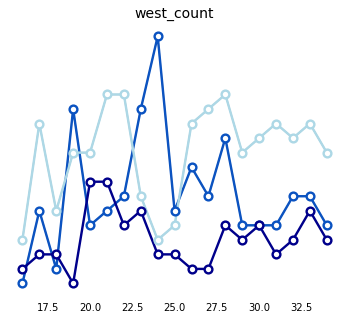

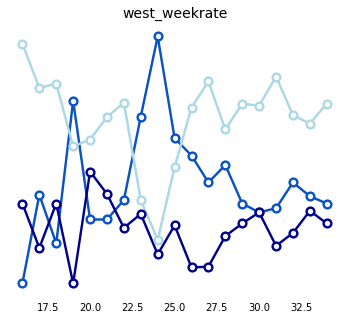

In [13]:
# plot
for direction in df.cluster.apply(lambda x:x[:-7]).unique().tolist():
    df_east_area = df[df.cluster.isin([direction+'_area_0',direction+'_area_1',direction+'_area_2'])]


    df_east_area['rate'] = df_east_area['count']
    for i in df_east_area.start_date.unique():
        countsum = df_east_area[df_east_area.start_date == i]['count'].sum()
        df_east_area.loc[df_east_area.start_date == i,'rate'] = df_east_area[df_east_area.start_date == i]['count'] / countsum
    df_east_area_day = df_east_area[['cluster','start_date','count','rate']]

    for i in df_east_area.start_week.unique():
        countsum = df_east_area[df_east_area.start_week == i]['count'].sum()
        df_east_area.loc[df_east_area.start_week == i,'weekrate'] = df_east_area[df_east_area.start_week == i]['count'] / countsum

    df_east_area_group = df_east_area.groupby(['cluster','start_week']).sum().reset_index()[['cluster','start_week','count','weekrate']]

    plot1(direction)
    plot2(direction)

In [14]:
# 分布可视化（时序）

In [15]:
df.cluster.unique()

array(['east_area_0', 'east_area_1', 'east_area_2', 'middle_area_0',
       'middle_area_1', 'middle_area_2', 'north_area_0', 'north_area_1',
       'north_area_2', 'northwest_area_0', 'northwest_area_1',
       'northwest_area_2', 'sourthwest_area_0', 'sourthwest_area_1',
       'sourthwest_area_2', 'west_area_0', 'west_area_1', 'west_area_2'],
      dtype=object)

## 2. 三元图可视化

In [16]:
# df_copy = pd.DataFrame(df)

# for i in tqdm(df_copy.index):
#     if df_copy.loc[i].cluster[0:7]=='northwe' or df_copy.loc[i].cluster[0:7]=='west_ar':
#         df_copy.loc[(df_copy['cluster'] == 'sourthwest'+df_copy.loc[i].cluster[-7:])&(df_copy['start_date'] == df_copy.loc[i].start_date),'count'] += df_copy.loc[i,'count']
        

In [17]:
# df_copy_copy = pd.DataFrame(df)

# for i in df_copy_copy.index:
#     if df_copy_copy.loc[i].cluster[0:7]=='northwe' or df_copy_copy.loc[i].cluster[0:7]=='west_ar':
#         df_copy_copy.loc[i,'cluster'] = 'sourthwest'+df_copy_copy.loc[i].cluster[-7:]

In [18]:
# 构造概率三元数组？

In [19]:
df.cluster.unique()

array(['east_area_0', 'east_area_1', 'east_area_2', 'middle_area_0',
       'middle_area_1', 'middle_area_2', 'north_area_0', 'north_area_1',
       'north_area_2', 'northwest_area_0', 'northwest_area_1',
       'northwest_area_2', 'sourthwest_area_0', 'sourthwest_area_1',
       'sourthwest_area_2', 'west_area_0', 'west_area_1', 'west_area_2'],
      dtype=object)

In [20]:
df.cluster.apply(lambda x:x[:-7]).unique().tolist()

['east', 'middle', 'north', 'northwest', 'sourthwest', 'west']

In [21]:
direction = df.cluster.apply(lambda x:x[:-7]).unique().tolist()[4]

In [22]:
direction

'sourthwest'

In [23]:
df_east_area = df[df.cluster.isin([direction+'_area_0',direction+'_area_1',direction+'_area_2'])]


df_east_area['rate'] = df_east_area['count']
for i in df_east_area.start_date.unique():
    countsum = df_east_area[df_east_area.start_date == i]['count'].sum()
    df_east_area.loc[df_east_area.start_date == i,'rate'] = df_east_area[df_east_area.start_date == i]['count'] / countsum
df_east_area_day = df_east_area[['cluster','start_date','count','rate']]

for i in df_east_area.start_week.unique():
    countsum = df_east_area[df_east_area.start_week == i]['count'].sum()
    df_east_area.loc[df_east_area.start_week == i,'weekrate'] = df_east_area[df_east_area.start_week == i]['count'] / countsum

df_east_area_group = df_east_area.groupby(['cluster','start_week']).sum().reset_index()[['cluster','start_week','count','weekrate']]


In [24]:
df_ternary_test = df_east_area_day.groupby(['start_date','cluster']).sum()
df_ternary = pd.DataFrame({'start_date':df_east_area_day.start_date.unique()})

In [25]:
for i in df_ternary.start_date:
    df_ternary.loc[df_ternary.start_date==i,direction+'_area_0'] = df_ternary_test.loc[i,direction + '_area_0']['rate']
    df_ternary.loc[df_ternary.start_date==i,direction+'_area_1'] = df_ternary_test.loc[i,direction+'_area_1']['rate']
    df_ternary.loc[df_ternary.start_date==i,direction+'_area_2'] = df_ternary_test.loc[i,direction+'_area_2']['rate']
    df_ternary.loc[df_ternary.start_date==i,'sum'] = df_ternary_test.loc[i]['count'].sum()

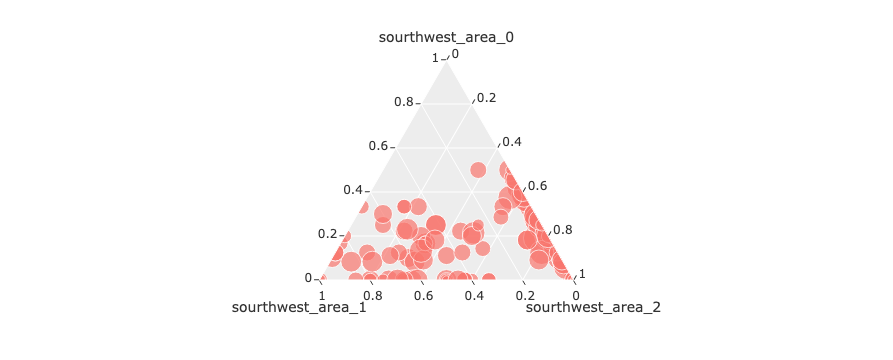

In [26]:
# plot
fig = px.scatter_ternary(df_ternary, a=direction+'_area_0', b=direction+'_area_1', c=direction+'_area_2',size = 'sum',color_discrete_map={"Views":"#00203F", 
                                             "Take Care":"#E34646"},
                         template="ggplot2")
fig.show()

In [27]:
def plot3(direction):
    df_east_area = df[df.cluster.isin([direction+'_area_0',direction+'_area_1',direction+'_area_2'])]

    df_east_area['rate'] = df_east_area['count']
    for i in df_east_area.start_date.unique():
        countsum = df_east_area[df_east_area.start_date == i]['count'].sum()
        df_east_area.loc[df_east_area.start_date == i,'rate'] = df_east_area[df_east_area.start_date == i]['count'] / countsum
    df_east_area_day = df_east_area[['cluster','start_date','count','rate']]

    for i in df_east_area.start_week.unique():
        countsum = df_east_area[df_east_area.start_week == i]['count'].sum()
        df_east_area.loc[df_east_area.start_week == i,'weekrate'] = df_east_area[df_east_area.start_week == i]['count'] / countsum

    df_east_area_group = df_east_area.groupby(['cluster','start_week']).sum().reset_index()[['cluster','start_week','count','weekrate']]


    df_ternary_test = df_east_area_day.groupby(['start_date','cluster']).sum()
    df_ternary = pd.DataFrame({'start_date':df_east_area_day.start_date.unique()})

    for i in df_ternary.start_date:
        df_ternary.loc[df_ternary.start_date==i,direction+'_area_0'] = df_ternary_test.loc[i,direction + '_area_0']['rate']
        df_ternary.loc[df_ternary.start_date==i,direction+'_area_1'] = df_ternary_test.loc[i,direction+'_area_1']['rate']
        df_ternary.loc[df_ternary.start_date==i,direction+'_area_2'] = df_ternary_test.loc[i,direction+'_area_2']['rate']
        df_ternary.loc[df_ternary.start_date==i,'sum'] = df_ternary_test.loc[i]['count'].sum()

    # plot
    fig = px.scatter_ternary(df_ternary, a=direction+'_area_0', b=direction+'_area_1', c=direction+'_area_2',size = 'sum',color_discrete_map={"Views":"#00203F", 
                                                 "Take Care":"#E34646"},
                             template="ggplot2",opacity = 0.5)
    fig.show()

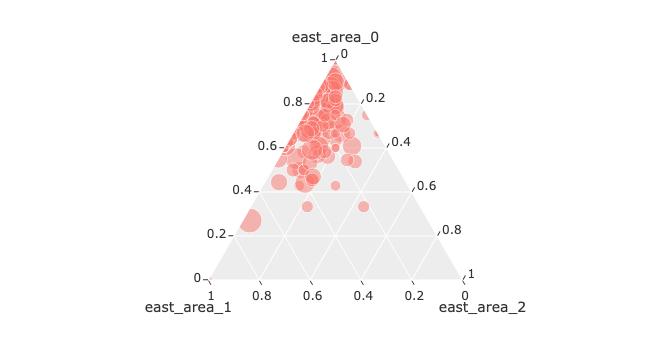

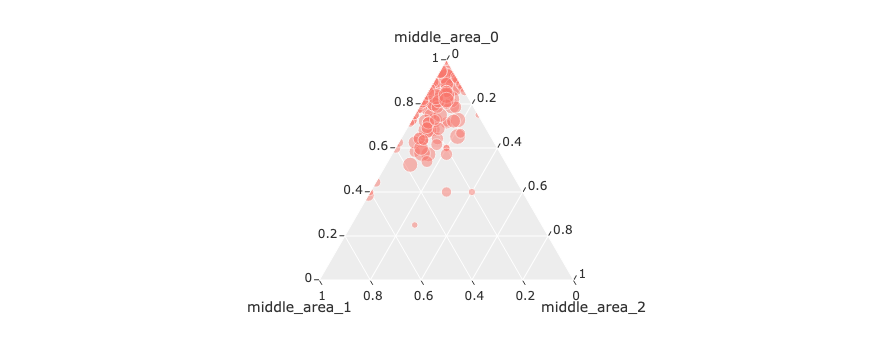

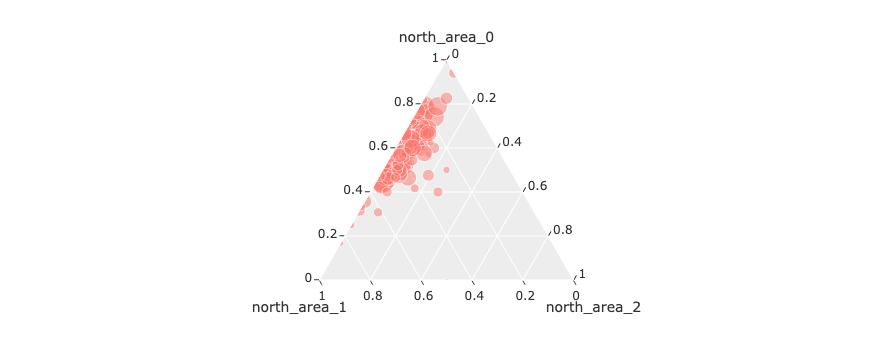

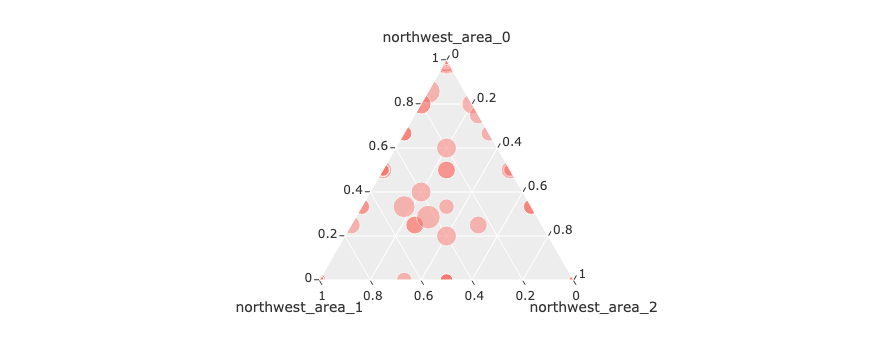

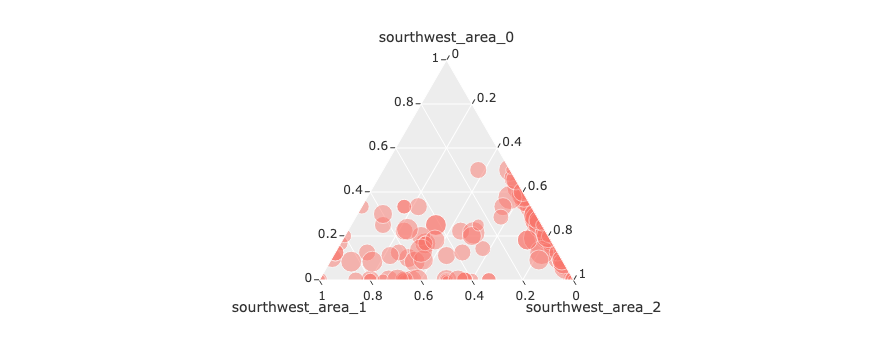

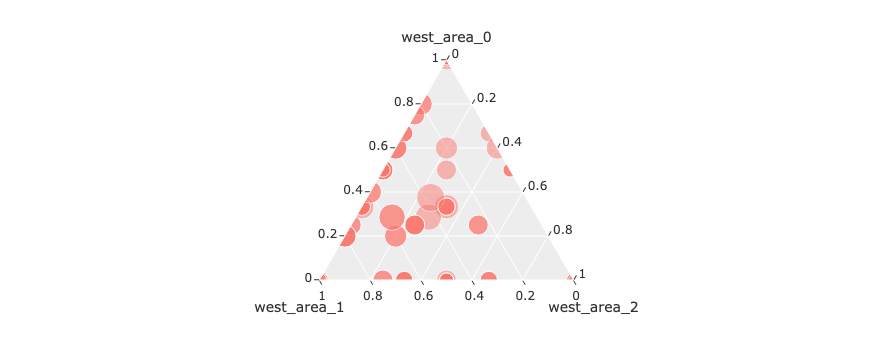

In [28]:
for direction in df.cluster.apply(lambda x:x[:-7]).unique().tolist():
    plot3(direction)

In [29]:
data = df
for direction in data.cluster.apply(lambda x:x[:-7]).unique().tolist():

    df_east_area = data[data.cluster.isin([direction+'_area_0',direction+'_area_1',direction+'_area_2'])]

    df_east_area['rate'] = df_east_area['count']
    for i in df_east_area.start_date.unique():
        countsum = df_east_area[df_east_area.start_date == i]['count'].sum()
        df_east_area.loc[df_east_area.start_date == i,'rate'] = df_east_area[df_east_area.start_date == i]['count'] / countsum
    df_east_area_day = df_east_area[['cluster','start_date','count','rate']]

    for i in df_east_area.start_week.unique():
        countsum = df_east_area[df_east_area.start_week == i]['count'].sum()
        df_east_area.loc[df_east_area.start_week == i,'weekrate'] = df_east_area[df_east_area.start_week == i]['count'] / countsum

    df_east_area_group = df_east_area.groupby(['cluster','start_week']).sum().reset_index()[['cluster','start_week','count','weekrate']]


    df_ternary_test = df_east_area_day.groupby(['start_date','cluster']).sum()
    df_ternary = pd.DataFrame({'start_date':df_east_area_day.start_date.unique()})

    for i in df_ternary.start_date:
        df_ternary.loc[df_ternary.start_date==i,'0'] = df_ternary_test.loc[i,direction + '_area_0']['rate']
        df_ternary.loc[df_ternary.start_date==i,'1'] = df_ternary_test.loc[i,direction+'_area_1']['rate']
        df_ternary.loc[df_ternary.start_date==i,'2'] = df_ternary_test.loc[i,direction+'_area_2']['rate']
        df_ternary.loc[df_ternary.start_date==i,'sum'] = df_ternary_test.loc[i]['count'].sum()
    df_ternary['direction'] = direction
    if direction == df.cluster.apply(lambda x:x[:-7]).unique().tolist()[0]:
        df_ternary_group = df_ternary
    if direction != df.cluster.apply(lambda x:x[:-7]).unique().tolist()[0]:
        df_ternary_group = pd.concat([df_ternary_group,df_ternary])

In [30]:
df_ternary_group.groupby('direction').sum()['sum'].tolist()

[1960.0, 1883.0, 5123.0, 376.0, 1216.0, 349.0]

In [31]:
df_ternary_group.reset_index(inplace = True)

In [32]:
for i in df_ternary_group.index:
    direction = df_ternary_group.loc[i,'direction']
    df_ternary_group.loc[i,'sum_'] = df_ternary_group.loc[i,'sum'] / df_ternary_group.groupby('direction').sum().loc[direction,'sum']
    

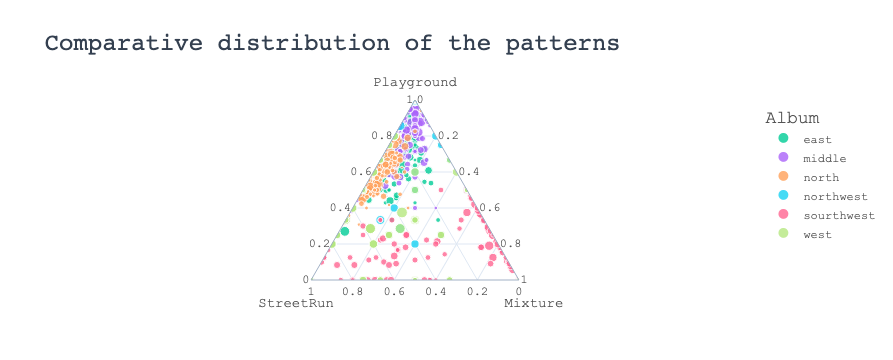

In [33]:
# plot
data = df_ternary_group

fig = px.scatter_ternary(data, a='0', b='1', c='2',size = 'sum_',color = 'direction',
                         size_max = 10,
                         
                         labels={"0": "Playground",
                                 "1": "StreetRun",
                                 "2": "Mixture"},
                         color_discrete_map = {"Views": "#00203F", 
                                               "Take Care": "#E34646"},
                         template="plotly_white",
                         title="Comparative distribution of the patterns",opacity = 0.8)

fig.update_layout(
    font_family="Courier New",
    font_color="#545454",
    title_font_family="Courier",
    title_font_color="#344050",
    legend_title="Album",
    legend_title_font_color="#545454",
    legend_title_font_size=18,
    title_font_size=24
)


fig.show()
fig.write_image('./yes1.png')

In [34]:
# 找前中后各自的质心

east
(0.728, 0.168, 0.104)
(0.746, 0.188, 0.066)
(0.682, 0.248, 0.071)


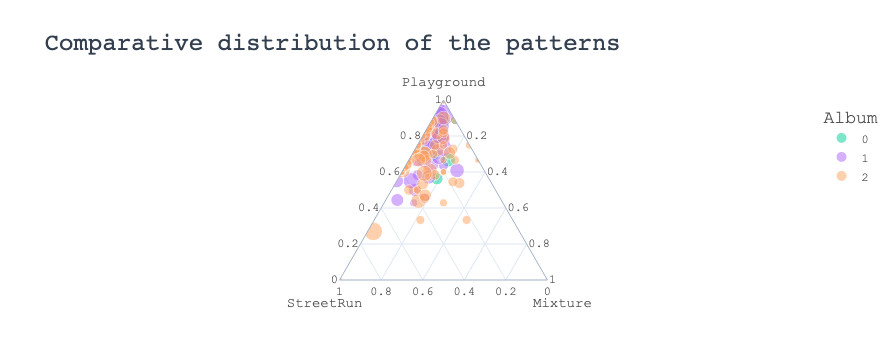

middle
(0.933, 0.038, 0.029)
(0.784, 0.144, 0.072)
(0.769, 0.164, 0.067)


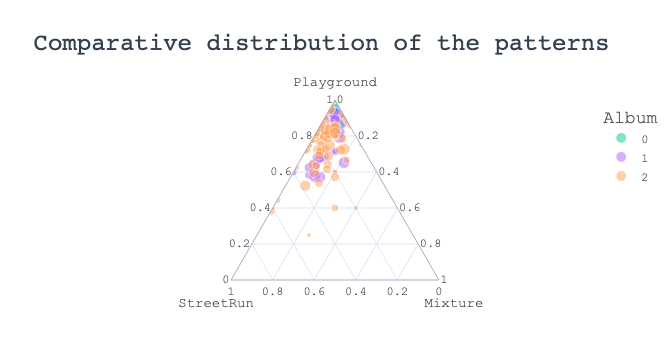

north
(0.648, 0.317, 0.035)
(0.582, 0.386, 0.033)
(0.584, 0.36, 0.055)


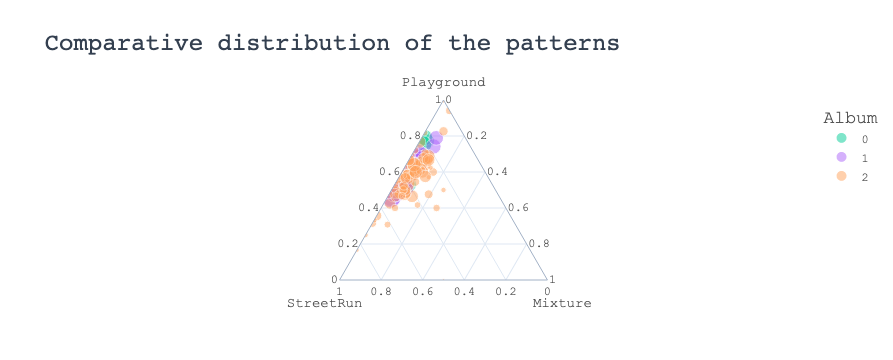

northwest
(0.474, 0.211, 0.316)
(0.951, 0.03, 0.018)
(0.596, 0.259, 0.145)


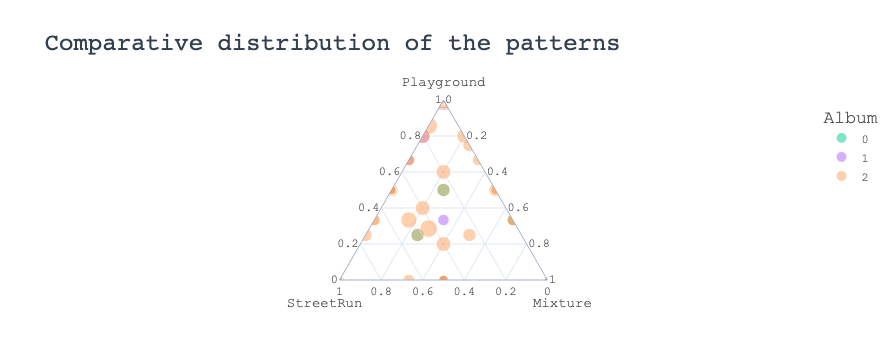

sourthwest
(0.18, 0.508, 0.311)
(0.272, 0.026, 0.702)
(0.123, 0.389, 0.488)


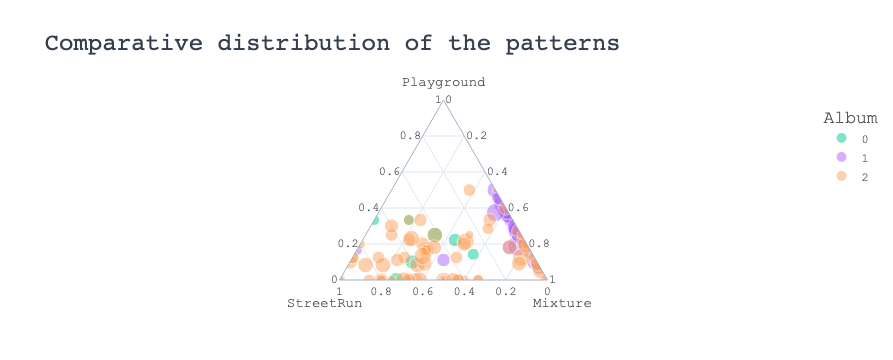

west
(0.227, 0.636, 0.136)
(0.297, 0.505, 0.198)
(0.372, 0.473, 0.155)


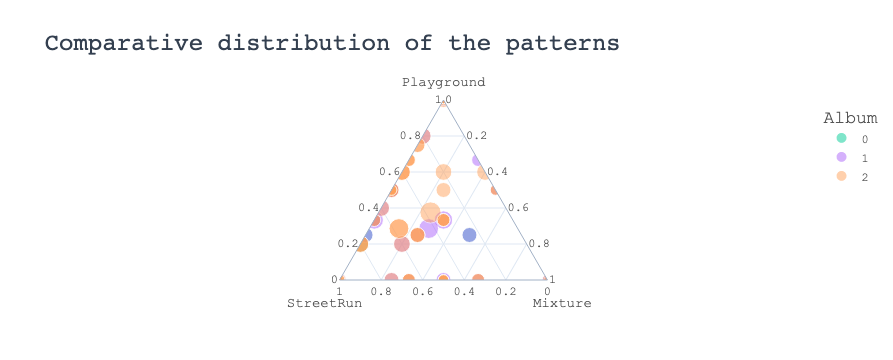

In [35]:
def findpt(df_test):
    a0 = (df_test['0']* df_test['sum']).sum()/ (df_test['sum'].sum())
    a1 = (df_test['1']* df_test['sum']).sum()/ (df_test['sum'].sum())
    a2 = (df_test['2']* df_test['sum']).sum()/ (df_test['sum'].sum())
    return(float("{:.3f}".format(a0)),float("{:.3f}".format(a1)),float("{:.3f}".format(a2)))

start_date = df_ternary_group.loc[11,'start_date']
end_date = df_ternary_group.loc[45,'start_date']
df_ternary_group['direction'].unique()

for i in range(len(df_ternary_group['direction'].unique())):
    df_test = df_ternary_group[df_ternary_group['direction'] == \
                               df_ternary_group['direction'].unique()[i]]
    print(df_ternary_group['direction'].unique()[i])

    df_test_0 = df_test[df_test['start_date'] <= start_date]
    df_test_1 = df_test[df_test['start_date'] > start_date][df_test['start_date'] < end_date]
    df_test_2 = df_test[df_test['start_date'] >= end_date]


    for i in df_test.index:
        if i in df_test_0.index:
            df_test.loc[i,'phrase'] = '0'
        if i in df_test_1.index:
            df_test.loc[i,'phrase'] = '1'
        if i in df_test_2.index:
            df_test.loc[i,'phrase'] = '2'

    print(findpt(df_test_0))
    print(findpt(df_test_1))
    print(findpt(df_test_2))
    # plot
    data = df_test

    fig = px.scatter_ternary(data, a='0', b='1', c='2',size = 'sum_',
                             color = 'phrase',
                             size_max = 15,
                             labels={"0": "Playground",
                                     "1": "StreetRun",
                                     "2": "Mixture"},
                             color_discrete_map = {"Views": "#00203F", 
                                                   "Take Care": "#E34646"},
                             template="plotly_white",
                             title="Comparative distribution of the patterns",
                             opacity = 0.5)

    fig.update_layout(
        font_family="Courier New",
        font_color="#545454",
        title_font_family="Courier",
        title_font_color="#344050",
        legend_title="Album",
        legend_title_font_color="#545454",
        legend_title_font_size=18,
        title_font_size=24
    )


    fig.show()
    # fig.write_image('./yes1.png')

## 3. ttest

In [36]:
df.head()

cluster start_date  count  start_week
0    east_area_0 2022-04-23    9.0          16
1    east_area_1 2022-04-23    4.0          16
2    east_area_2 2022-04-23    3.0          16
3  middle_area_0 2022-04-23   20.0          16
4  middle_area_1 2022-04-23    1.0          16

In [37]:
df_east_area.head()

cluster start_date  count  start_week  rate  weekrate
15  west_area_0 2022-04-23    0.0          16   0.0      0.00
16  west_area_1 2022-04-23    1.0          16   0.5      0.25
17  west_area_2 2022-04-23    1.0          16   0.5      0.25
33  west_area_0 2022-04-24    0.0          16   0.0      0.00
34  west_area_1 2022-04-24    2.0          16   1.0      0.50

In [38]:
df_east_area_group.head()

cluster  start_week  count  weekrate
0  west_area_0          16    0.0  0.000000
1  west_area_0          17    5.0  0.277778
2  west_area_0          18    1.0  0.125000
3  west_area_0          19   12.0  0.571429
4  west_area_0          20    4.0  0.200000

In [39]:
# 关键帧

In [40]:
date0427 = df_ternary_group.loc[254,'start_date']
date0428 = df_ternary_group.loc[255,'start_date']
date0429 = df_ternary_group.loc[256,'start_date']

date0430 = df_ternary_group.loc[257,'start_date']
date0501 = df_ternary_group.loc[258,'start_date']
date0502 = df_ternary_group.loc[259,'start_date']
date0503 = df_ternary_group.loc[260,'start_date']
date0504 = df_ternary_group.loc[261,'start_date']
date0505 = df_ternary_group.loc[262,'start_date']

date0506 = df_ternary_group.loc[263,'start_date']
date0507 = df_ternary_group.loc[264,'start_date']
date0508 = df_ternary_group.loc[265,'start_date']

date0607 = df_ternary_group.loc[295,'start_date']

In [44]:
date0626 = df_ternary_group.loc[314,'start_date']

In [45]:
# 插值

In [46]:
for i in df_ternary_group.index:
    for date1, date2 in [[date0430,date0427],[date0501,date0428],[date0502,date0429],[date0503,date0427],[date0504,date0428],[date0505,date0429],]:

        if df_ternary_group.loc[i,'start_date'] == date1:
            for column in ['0','1','2','sum','sum_']:
                df_ternary_group.loc[i,column] = df_ternary_group[df_ternary_group['start_date'] == date2][df_ternary_group['direction'] == df_ternary_group.loc[i,'direction']][column].tolist()[0]

In [47]:
df_ternary_group[df_ternary_group['direction'] == 'north'].head()

index start_date         0         1         2   sum direction      sum_
250      0 2022-04-23  0.530864  0.407407  0.061728  81.0     north  0.015811
251      1 2022-04-24  0.771930  0.192982  0.035088  57.0     north  0.011126
252      2 2022-04-25  0.791045  0.194030  0.014925  67.0     north  0.013078
253      3 2022-04-26  0.530120  0.433735  0.036145  83.0     north  0.016201
254      4 2022-04-27  0.753247  0.220779  0.025974  77.0     north  0.015030

In [48]:
from scipy import stats
import numpy as np

In [49]:
# 数量验证 'sum' 字段

In [50]:
suddendate0 = date0430 = df_ternary_group.loc[257,'start_date']
suddendate3 = date0707 = df_ternary_group.loc[325,'start_date']


In [51]:
direction = 'sourthwest' #验证的组
column = '2' # 检验的变量
suddendate1 = date0505# 第一个分割点
suddendate2 = date0626# 第二个分割点


In [52]:
rvs0 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate1][column])
rvs1 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate2][df_ternary_group['start_date'] > suddendate1][column])
rvs2 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] > suddendate2][column])

In [53]:
rvs,rvs_ = rvs0, rvs1
f, fp = stats.levene(rvs, rvs_) # 方差齐性，p大于0.05就可以继续下面的ttest，如果不通过则需要用矫正的ttest
t, tp = stats.ttest_ind(rvs,rvs_)
t_, tp_ = stats.ttest_ind(rvs,rvs_, equal_var = False)
md = rvs_.mean() - rvs.mean()

In [54]:
print(f,fp,t, tp,t_, tp_,md)

0.015838903722586915 0.9002492929075401 -6.261076330040541 3.800529573568557e-08 -6.955577824458739 6.518368001168589e-07 0.3786755311582651


In [55]:
# loop

In [56]:
directionlst = df.cluster.apply(lambda x:x[:-7]).unique().tolist()

In [57]:
df_ttest = pd.DataFrame(columns = ['direction','y','phase','fornot','f','fp','t','tp','md','df'])

for direction in tqdm(directionlst):
    for column in ['0','1','2','sum']:
        rvs0 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate1][column])
        rvs1 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate2][df_ternary_group['start_date'] > suddendate1][column])
        rvs2 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] > suddendate2][column])
        
        for rvs,rvs_,period in [[rvs0,rvs1,'s1'],[rvs1,rvs2,'s2'],[rvs0,rvs2,'c']]:
            f, fp = stats.levene(rvs, rvs_) # 方差齐性，p大于0.05就可以继续下面的ttest，如果不通过则需要用矫正的ttest
            t, tp = stats.ttest_ind(rvs,rvs_)
            t_, tp_ = stats.ttest_ind(rvs,rvs_, equal_var = False)
            md = rvs_.mean() - rvs.mean()
            df_ = len(rvs) + len(rvs_) -2
            
            df_ttest.loc[len(df_ttest)] = [direction,column,period,1,f, fp,t, tp,md,df_]
            df_ttest.loc[len(df_ttest)] = [direction,column,period,0,f, fp,t_, tp_,md,df_]
            

df_ttest_COPY = df_ttest

100%|███████████████████████████████████████████████| 6/6 [00:00<00:00,  9.68it/s]


In [58]:
df_ttest = pd.DataFrame(columns = ['direction','y','phase','fornot','f','fp','t','tp','md','df'])
for direction in tqdm(directionlst):
    for column in ['0','1','2','sum']:
        rvs0 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate1][column])
        rvs1 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] <= suddendate2][df_ternary_group['start_date'] > suddendate1][column])
        rvs2 = np.array(df_ternary_group[df_ternary_group['direction'] == direction][df_ternary_group['start_date'] > suddendate2][column])
        
        for rvs,rvs_,period in [[rvs0,rvs1,'s1'],[rvs1,rvs2,'s2'],[rvs0,rvs2,'c']]:
            f, fp = stats.levene(rvs, rvs_) # 方差齐性，p大于0.05就可以继续下面的ttest，如果不通过则需要用矫正的ttest
            t, tp = stats.ttest_ind(rvs,rvs_)
            t_, tp_ = stats.ttest_ind(rvs,rvs_, equal_var = False)
            md = rvs_.mean() - rvs.mean()
            df_ = len(rvs) + len(rvs_) -2
            
            if fp > 0.05:
                df_ttest.loc[len(df_ttest)] = [direction,column,period,1,f, fp,t, tp,md,df_]
            elif fp <=0.05:
                df_ttest.loc[len(df_ttest)] = [direction,column,period,0,f, fp,t_, tp_,md,df_]
            

100%|███████████████████████████████████████████████| 6/6 [00:00<00:00, 14.10it/s]


In [59]:
df_ttest[df_ttest['y'] == 'sum'][df_ttest['tp'] > 0.05]

direction    y phase fornot         f        fp         t        tp  \
21      middle  sum    s1      0  4.055159  0.048312  1.488852  0.160311   
33       north  sum    s1      1  0.176196  0.676091 -0.427884  0.670194   
47   northwest  sum     c      1  2.844434  0.096081  1.928245  0.057824   
59  sourthwest  sum     c      0  4.786599  0.031975  1.160059  0.255369   
69        west  sum    s1      1  0.547040  0.462277  0.924709  0.358646   
70        west  sum    s2      1  0.003666  0.951827  0.135616  0.892373   
71        west  sum     c      1  0.499873  0.481870  0.977462  0.331660   

          md   df  
21 -7.269231   63  
33  3.019231   63  
47 -0.929487   71  
59 -0.792308   71  
69 -0.442308   63  
70 -0.042308  110  
71 -0.484615   71

In [60]:
df_ttest[df_ttest['y'] == '0'][df_ttest['tp'] < 0.05]

direction  y phase fornot          f        fp         t            tp  \
12      middle  0    s1      0  13.958632  0.000405  7.363916  5.626682e-10   
13      middle  0    s2      0   3.947904  0.049416 -2.449066  1.616532e-02   
14      middle  0     c      0   9.110182  0.003529  6.066295  5.884944e-08   
36   northwest  0    s1      1   2.825211  0.097747 -3.284286  1.671799e-03   
37   northwest  0    s2      0   4.541627  0.035307  8.245609  4.071681e-13   
49  sourthwest  0    s2      1   0.120717  0.728922  4.072222  8.806608e-05   

          md   df  
12 -0.178032   63  
13  0.068324  110  
14 -0.109708   71  
36  0.355907   63  
37 -0.531038  110  
49 -0.100955  110

In [61]:
df_ttest[df_ttest['y'] == '1'][df_ttest['tp'] < 0.05]

direction  y phase fornot          f            fp          t  \
15      middle  1    s1      0   5.467747  2.255821e-02  -5.306516   
16      middle  1    s2      0   4.759488  3.126519e-02   2.400073   
17      middle  1     c      0   4.962768  2.906881e-02  -4.021542   
39   northwest  1    s1      0  20.518432  2.690764e-05   2.686634   
40   northwest  1    s2      0  81.415429  6.740081e-15  -5.929281   
51  sourthwest  1    s1      0  10.968544  1.537630e-03   9.035974   
52  sourthwest  1    s2      0  35.997268  2.575057e-08 -14.545215   
64        west  1    s2      0   6.170085  1.450063e-02  -2.605485   

              tp        md   df  
15  1.822903e-06  0.131403   63  
16  1.859759e-02 -0.057641  110  
17  2.983568e-04  0.073762   71  
39  1.822926e-02 -0.172253   63  
40  1.040018e-07  0.302579  110  
51  1.592414e-07 -0.432331   63  
52  3.812528e-25  0.511193  110  
64  1.059846e-02  0.157205  110

In [62]:
df_ttest[df_ttest['y'] == '2'][df_ttest['tp'] < 0.05]

direction  y phase fornot          f        fp         t            tp  \
6         east  2    s1      1   0.006773  0.934670  2.653880  1.006043e-02   
18      middle  2    s1      1   3.350068  0.071933 -2.212239  3.058349e-02   
31       north  2    s2      0   8.134697  0.005188 -2.542024  1.313222e-02   
32       north  2     c      0   4.298614  0.041773 -2.932398  4.566220e-03   
42   northwest  2    s1      0  12.572048  0.000745  3.214728  6.430497e-03   
43   northwest  2    s2      0   6.950522  0.009591 -2.725757  7.587148e-03   
44   northwest  2     c      1   0.984256  0.324520  2.115348  3.791004e-02   
54  sourthwest  2    s1      1   0.015839  0.900249 -6.261076  3.800530e-08   
55  sourthwest  2    s2      1   1.139263  0.288145  9.679294  2.127490e-16   

          md   df  
6  -0.050271   63  
18  0.046629   63  
31  0.028416  110  
32  0.032583   71  
42 -0.279808   63  
43  0.107946  110  
44 -0.171862   71  
54  0.378676   63  
55 -0.391007  110

In [63]:
df_ttest[df_ttest['y'] == 'sum']

direction    y phase fornot          f        fp          t  \
9         east  sum    s1      1   3.260960  0.075725  -2.007619   
10        east  sum    s2      0  10.690482  0.001438   8.670212   
11        east  sum     c      1   0.011615  0.914480   4.217407   
21      middle  sum    s1      0   4.055159  0.048312   1.488852   
22      middle  sum    s2      0   5.006151  0.027273   3.601598   
23      middle  sum     c      0   9.188901  0.003397   2.399768   
33       north  sum    s1      1   0.176196  0.676091  -0.427884   
34       north  sum    s2      0  22.338351  0.000007  12.055370   
35       north  sum     c      0   6.149511  0.015519   5.751822   
45   northwest  sum    s1      0  13.026199  0.000609  -3.703957   
46   northwest  sum    s2      0  18.514743  0.000037   6.039040   
47   northwest  sum     c      1   2.844434  0.096081   1.928245   
57  sourthwest  sum    s1      0   7.231625  0.009156  -5.031902   
58  sourthwest  sum    s2      0   4.998243  0.027392   6.487815   
59  sourthwest  sum     c      0   4.786599  0.031975   1.160059   
69        west  sum    s1      1   0.547040  0.462277   0.924709   
70        west  sum    s2      1   0.003666  0.951827   0.135616   
71        west  sum     c      1   0.499873  0.481870   0.977462   

              tp         md   df  
9   4.897731e-02   5.576923   63  
10  2.604775e-13 -13.400000  110  
11  7.178897e-05  -7.823077   71  
21  1.603107e-01  -7.269231   63  
22  5.099559e-04  -4.321795  110  
23  3.279581e-02 -11.591026   71  
33  6.701944e-01   3.019231   63  
34  6.600039e-19 -41.447436  110  
35  6.373407e-05 -38.428205   71  
45  4.867674e-04   1.769231   63  
46  4.586970e-08  -2.698718  110  
47  5.782397e-02  -0.929487   71  
57  7.103537e-06   4.230769   63  
58  4.652972e-09  -5.023077  110  
59  2.553688e-01  -0.792308   71  
69  3.586458e-01  -0.442308   63  
70  8.923728e-01  -0.042308  110  
71  3.316595e-01  -0.484615   71

In [ ]:
import geopandas as gpd

In [ ]:
gdf = gpd.read_file('../04_output/trajectories1001.shp')

In [ ]:
gdf[115:116]

In [ ]:
gdf[115:116].to_file('../04_output/trajectories1014.shp')